## Dos especies: sistema depredador-presa

Sistema de $N$ sitios, de los cuales $n$ son de la especie $A$ (depredador) y $m$ son de la especie $B$ (presa).

Las interacciones posibles son de diferentes tipos:
- Procesos de nacimiento: $BE \rightarrow BB$ con una tasa $b$.
- Procesos de muerte: $A \rightarrow E$ y $B \rightarrow E$ con tasas $d_1$ y $d_2$ respectivamente.
- Procesos depredador-presa: $AB \rightarrow AA$ y $AB \rightarrow AE$ con tasas $p_1$ y $p_2$ respectivamente.


El proceso puede ser modelado, utilizando la ecuación Maestra y reemplazando por los valores de las tasas de transiciones correspondientes. Al tomar el valor medio $\langle n \rangle$ y $\langle m \rangle$, sus evoluciones vienen dadas por
$$\frac{d \langle n \rangle /N}{dt} = \frac{2p_1}{N-1}\left\langle \frac{n}{N} \frac{m}{N} \right\rangle - \frac{d_1}{N} \left\langle \frac{n}{N} \right\rangle$$
$$\frac{d \langle m \rangle /N}{dt} = \frac{2b}{N-1} \left\langle \frac{m}{N} \left(1-\frac{n}{N} - \frac{m}{N}\right)\right\rangle - 
\frac{2(p_1+p_2)}{N-1}\left\langle\frac{m}{N}\frac{n}{N}\right\rangle - \frac{d_2}{N} \left\langle \frac{m}{N} \right\rangle$$

Al tomar el límite $N\rightarrow \infty$, estas evoluciones se pueden escribir como sigue 

$$\frac{d \langle n \rangle /N}{dt} := \frac{df_1}{dt} = \frac{2p_1}{N-1} f_1 f_2 - \frac{d_1}{N} f_1,$$

$$\frac{d \langle m \rangle /N}{dt} := \frac{df_2}{dt} = r\left(1-\frac{f_2}{K}\right) - 2\frac{p_1 + p_2 + b}{N-1} f_1 f_2,$$

con $r = \frac{2b}{N-1} - \frac{d_2}{N}$ y $K = 1-\frac{d_2}{b}\frac{N-1}{N}$. Esta es la forma de la ecuación de Lokta Volterra.

Existe un equilibrio que surge de igualar ambas ecuaciones a 0 y resultan

$$f_1^{est} = \frac{2bp_1 - \frac{N-1}{N}\frac{1-\mu}{\mu}(p_1d_2 + bd_1)}{2(p_1+p_2+b)p_1},$$
$$f_2^{est} = \frac{N-1}{N}\frac{1-\mu}{\mu}\frac{d_1}{2p_1},$$

donde se ha incluido el factor $\mu$ que indica la probabilidad de que en cada instante de tiempo se realice una interacción entre dos especies ($(1-\mu)$ es la probabilidad de que la interacción sea de una especie).

Más allá del modelo, podemos hacer la simulación para un caso particular de las funciones que ya implementamos en el notebook `noSpatialModel.ipynb`. De todas maneras es un poco diferente porque está incluida la interacción $AB \rightarrow AA$ con un rate $p_1$ que antes no la considerabamos.

In [1]:
# imoprt libraries
import random
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
# Choice of the specie in the place
def specie_choiced(place, n, m):
    if place < n:
        return "A"
    elif place < n + m:
        return "B"
    else:
        return "E"

# Choice of the species in the places
def species_choiced(place1, place2, n, m):
    specie1 = specie_choiced(place1, n, m)
    specie2 = specie_choiced(place2, n, m)
    return specie1, specie2

# population evolution for two species
def population_evolution_two_species(N, n_initial, m_initial, mu, d1, d2, p1, p2, b, t_max):
    #Initialization of n and m
    n = n_initial
    m = m_initial

    #Initialization of the list of n and m
    history_n = [n]
    history_m = [m]

    #Iterate over time
    for t in range(t_max):
        #Choice he the interaction (1-mu: single, mu: double)
        if random.random() > mu:
            #Single interaction
            place = random.randint(0, N-1)
            specie = specie_choiced(place, n, m)
            if specie == "A": # The place choose is A
                if random.random() < d1:
                    # Dying proccess occurs (A -> E)
                    n = n - 1   # "A" site is converted to "E"
            elif specie == "B": # The place choose is B
                if random.random() < d2:
                    # Dying proccess occurs (B -> E)
                    m = m - 1   # "B" site is converted to "E"
        else:
            #Double interaction
            place1, place2 = random.sample(range(N), 2)
            specie1, specie2 = species_choiced(place1, place2, n, m)
            # switch between the posibilities of species
            # we are interested only in the following combinations BE and AB
            if (specie1 == "B" and specie2 == "E") or (specie1 == "E" and specie2 == "B"):
                if random.random() < b:
                    # Birth proccess occurs (B + E -> B + B)
                    m = m + 1
            elif (specie1 == "A" and specie2 == "B") or (specie1 == "B" and specie2 == "A"):
                aux = random.random()
                if aux < p1:
                    # Predation 1 proccess occurs (A + B -> A + A)
                    n, m = n + 1, m - 1
                elif aux < p1 + p2:
                    # Predation 2 proccess occurs (A + B -> B + E)
                    n, m = n, m - 1
            else:
                # Do nothing if another combination has been chosen
                pass

        #Append the new value of n and m to the history
        history_n.append(n)
        history_m.append(m)
    
    return history_n, history_m
                

In [6]:
# ensamble population evolution for two species
def ensamble_population_evolution_two_species(N, n_initial, m_initial, mu, d1, d2, p1, p2, b, t_max, n_runs):
    #Initialization of the list of n and m
    history_n = np.zeros((n_runs, t_max+1))
    history_m = np.zeros((n_runs, t_max+1))

    #Iterate over the number of runs
    for i in tqdm(range(n_runs)):
        history_n[i, :], history_m[i, :] = population_evolution_two_species(N, n_initial, m_initial, mu, d1, d2, p1, p2, b, t_max)
    
    return history_n, history_m

# Observables
def get_density_from_ensamble_two_species(history_n, history_m, N):
    return np.mean(history_n, axis=0) / N, np.mean(history_m, axis=0) / N

def get_variance_from_ensamble_two_species(history_n, history_m, N):
    return np.var(history_n, axis=0) / (N*N), np.var(history_m, axis=0) / (N*N)

Hacemos una simulación para $N = 3200$, $b = 0.1$, $d_1 = 0.1$, $d_2 = 0.0$, $p_1 = 0.25$, $p_2 = 0.05$.

In [20]:
# Parameters
N = 3200         # Number of sites
n_initial = 1600 # Initial number of species A
m_initial = 1600 # Initial number of species B
mu = 0.5         # Probability of double interaction
d1 = 0.1         # Death rate for species A
d2 = 0.0         # Death rate for species B
p1 = 0.25        # Predation rate 1
p2 = 0.05        # Predation rate 2
b = 0.1          # Birth rate
t_max = 100000     # Number of time steps
n_runs = 100     # Number of runs

In [21]:
# Simulation
history_n, history_m = ensamble_population_evolution_two_species(N, n_initial, m_initial, mu, d1, d2, p1, p2, b, t_max, n_runs)

100%|██████████| 100/100 [00:30<00:00,  3.25it/s]


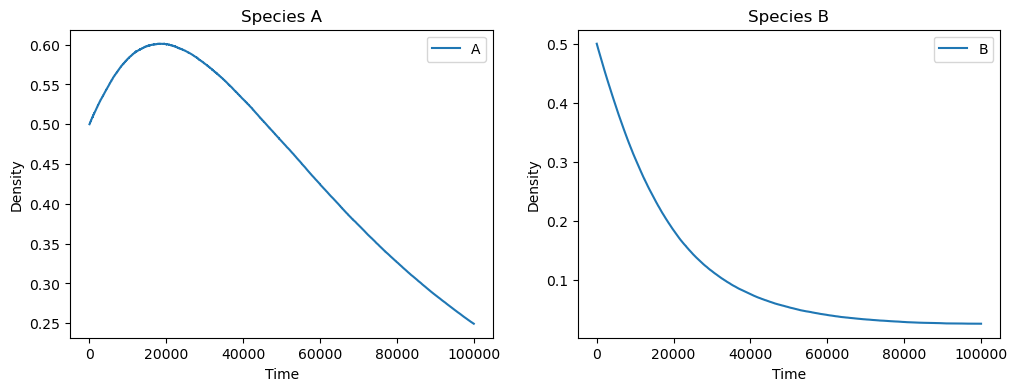

In [22]:
# Observables
density_n, density_m = get_density_from_ensamble_two_species(history_n, history_m, N)

# Plots (subplots for each species and observables)
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Species A
axs[0].plot(density_n, label="A")
axs[0].set_title("Species A")
axs[0].set_xlabel("Time")
axs[0].set_ylabel("Density")
axs[0].legend()

# Species B
axs[1].plot(density_m, label="B")
axs[1].set_title("Species B")
axs[1].set_xlabel("Time")
axs[1].set_ylabel("Density")
axs[1].legend()

plt.show()


Se extingue la especie B! y por lo tanto la especie A tiene el mismo destino.

Vamos a ver si cambiamos el rate de probabilidad de interacciones dobles cambia las cosas. Tomamos $\mu = 0.7$ y $\mu = 0.3$

In [24]:
# Simulation
history_n2, history_m2 = ensamble_population_evolution_two_species(N, n_initial, m_initial, 0.7, d1, d2, p1, p2, b, t_max, n_runs)

100%|██████████| 100/100 [00:40<00:00,  2.50it/s]


In [27]:
# Simulación con mu = 0.3
history_n3, history_m3 = ensamble_population_evolution_two_species(N, n_initial, m_initial, 0.3, d1, d2, p1, p2, b, t_max, n_runs)

100%|██████████| 100/100 [00:24<00:00,  4.06it/s]


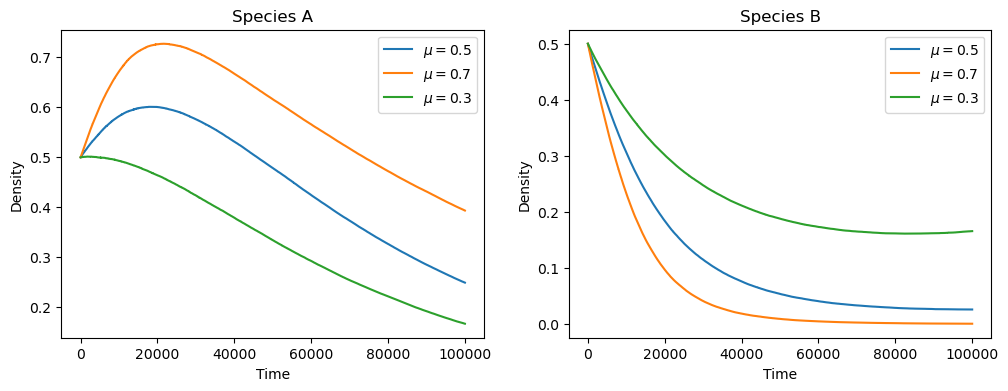

In [28]:
# Observables
density_n2, density_m2 = get_density_from_ensamble_two_species(history_n2, history_m2, N)
density_n3, density_m3 = get_density_from_ensamble_two_species(history_n3, history_m3, N)

# Plots (subplots for each species and observables)
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Species A
axs[0].plot(density_n, label=r"$\mu = 0.5$")
axs[0].plot(density_n2, label=r"$\mu = 0.7$")
axs[0].plot(density_n3, label=r"$\mu = 0.3$")
axs[0].set_title("Species A")
axs[0].set_xlabel("Time")
axs[0].set_ylabel("Density")
axs[0].legend()

# Species B
axs[1].plot(density_m, label=r"$\mu = 0.5$")
axs[1].plot(density_m2, label=r"$\mu = 0.7$")
axs[1].plot(density_m3, label=r"$\mu = 0.3$")
axs[1].set_title("Species B")
axs[1].set_xlabel("Time")
axs[1].set_ylabel("Density")
axs[1].legend()

plt.show()

Para $\mu = 0.3$ la especie $B$ parece no extinguirse. Las simulaciones parecen mucho mas "suaves" que las cuevas del paper

Hacemos una sola corrida más larga

In [31]:
# Parameters
N = 3200         # Number of sites
n_initial = 1600 # Initial number of species A
m_initial = 1600 # Initial number of species B
mu = 0.3         # Probability of double interaction
d1 = 0.1         # Death rate for species A
d2 = 0.0         # Death rate for species B
p1 = 0.25        # Predation rate 1
p2 = 0.05        # Predation rate 2
b = 0.1          # Birth rate
t_max = 10000000     # Number of time steps
n_runs = 1     # Number of runs

In [32]:
# Simulation
history_n4, history_m4 = ensamble_population_evolution_two_species(N, n_initial, m_initial, mu, d1, d2, p1, p2, b, t_max, n_runs)

100%|██████████| 1/1 [00:25<00:00, 25.53s/it]


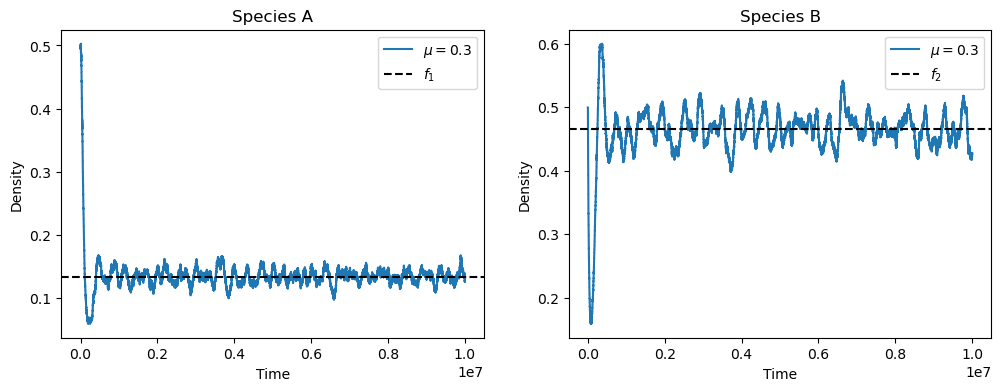

In [37]:
# Observables
density_n4, density_m4 = get_density_from_ensamble_two_species(history_n4, history_m4, N)

# Plots (subplots for each species and observables)
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Equilibrium
f1_est = (2*b*p1 - (N-1)/N*(1-mu)/mu*(p1*d2 + b*d1)) / (2*(p1+p2+b)*p1)
f2_est = (N-1)/N*d1/(2*p1)*(1-mu)/mu

# Species A
axs[0].plot(density_n4, label=r"$\mu = 0.3$")
axs[0].axhline(f1_est, color='black', linestyle='--', label=r"$f_1$")
axs[0].set_title("Species A")
axs[0].set_xlabel("Time")
axs[0].set_ylabel("Density")
axs[0].legend()

# Species B
axs[1].plot(density_m4, label=r"$\mu = 0.3$")
axs[1].axhline(f2_est, color='black', linestyle='--', label=r"$f_2$")
axs[1].set_title("Species B")
axs[1].set_xlabel("Time")
axs[1].set_ylabel("Density")
axs[1].legend()

plt.show()